In [1]:
!pip install scikit-image

     |████████████████████████████████| 13.5MB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 6.4MB 11.8MB/s eta 0:00:01
     |████████████████████████████████| 3.4MB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 184kB 11.7MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 38.1MB 4.9MB/s eta 0:00:012
ERROR: imageio 2.17.0 has requirement pillow>=8.3.2, but you'll have pillow 7.0.0 which is incompatible.


In [3]:
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

/opt/conda/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [6]:
image = io.imread('test_images/image_1.jpg')

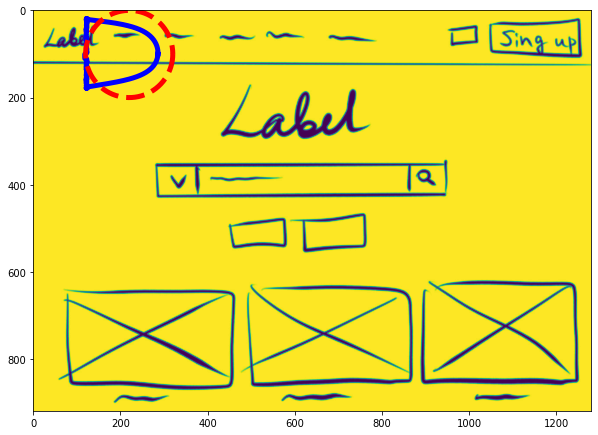

In [4]:
gray_image = rgb2gray(image)
gray_image_noiseless = gaussian(gray_image, 1)
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))
 
# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T
 
# Computing the Active Contour for the given image
image_snake = active_contour(gray_image_noiseless,
                                 snake)
 
fig = plt.figure(figsize=(10, 10))
 
# Adding subplots to display the markers
ax = fig.add_subplot(111)
 
# Plotting sample image
ax.imshow(gray_image_noiseless)
 
# Plotting the face boundary marker
ax.plot(image_snake[:, 0],
        image_snake[:, 1],
        '-b', lw=5)
 
# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

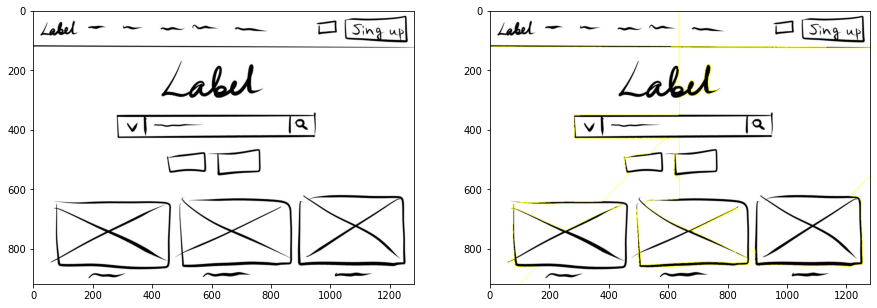

In [5]:
from skimage.segmentation import slic, mark_boundaries

plt.figure(figsize=(15, 15))
image_segments = slic(image, n_segments=10, compactness=1)
 
plt.subplot(1, 2, 1)
 
# Plotting the original image
plt.imshow(image)
 
# Detecting boundaries for labels
plt.subplot(1, 2, 2)
 
# Plotting the ouput of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(image, image_segments))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `multichannel` is a deprecated argument name for `felzenszwalb`. It will be removed in version 1.0. Please use `channel_axis` instead.
  if sys.path[0] == "":


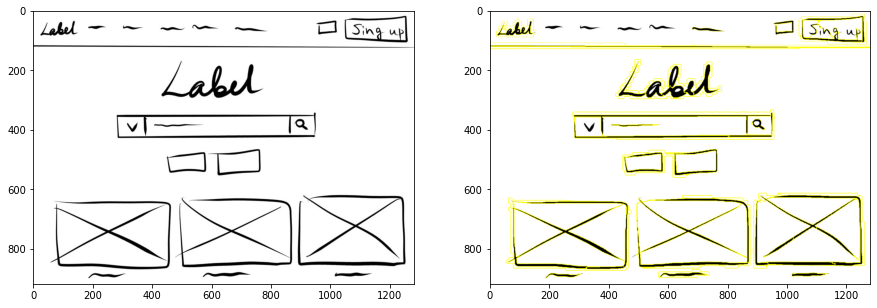

In [6]:
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb

plt.figure(figsize=(15,15))
 
# computing the Felzenszwalb's
# Segmentation with sigma = 5 and minimum
# size = 100
image_segments = felzenszwalb(np.mean(image,axis=2),
                                  scale = 400,
                                  sigma=0.5,
                                  min_size=400, multichannel=False)
 
# Plotting the original image
plt.subplot(1,2,1)
plt.imshow(image)
 
# Marking the boundaries of
# Felzenszwalb's segmentations
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(image,
                           image_segments))

In [7]:
print(type(image))

<class 'numpy.ndarray'>


In [7]:
def get_rectang(mask):
    min_i, min_j, max_i, max_j = None, None, None, None
    for row_idx, mask_row in enumerate(mask):
        for col_idx, mask_element in enumerate(mask_row):
            if min_i is None and mask_element:
                min_i = row_idx
            if mask_element and (min_j is None or min_j > col_idx):
                min_j = col_idx
            if mask_element:
                max_i = row_idx
            if mask_element and (max_j is None or max_j < col_idx):
                max_j = col_idx
    return min_i, min_j, max_i, max_j

In [8]:
def plot_segment(image, segment_id, segments):
    min_i, min_j, max_i, max_j = get_rectang(segments == segment_id)
    plt.imshow(image[min_i:max_i, min_j:max_j])

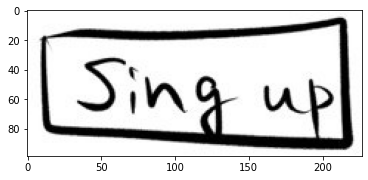

In [10]:
plot_segment(image, 1, image_segments)

In [54]:
image_segments.max()

74

In [11]:
18
for scale in range(400, 401, 10):
    for sigma in np.arange(0.5, 0.6, 0.1):
        for min_size in range(1000, 1500, 20):
            image_segments = felzenszwalb(np.mean(image,axis=2),
                                          scale = scale,
                                          sigma=sigma,
                                          min_size=min_size, multichannel=False)
            print(scale, sigma, min_size, image_segments.max())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `multichannel` is a deprecated argument name for `felzenszwalb`. It will be removed in version 1.0. Please use `channel_axis` instead.
  


400 0.5 1000 42
400 0.5 1020 42
400 0.5 1040 42
400 0.5 1060 40
400 0.5 1080 40
400 0.5 1100 40
400 0.5 1120 40
400 0.5 1140 38
400 0.5 1160 37
400 0.5 1180 37
400 0.5 1200 37
400 0.5 1220 37
400 0.5 1240 37
400 0.5 1260 37
400 0.5 1280 37
400 0.5 1300 36
400 0.5 1320 36
400 0.5 1340 36
400 0.5 1360 35
400 0.5 1380 35
400 0.5 1400 35
400 0.5 1420 35
400 0.5 1440 35
400 0.5 1460 35
400 0.5 1480 35


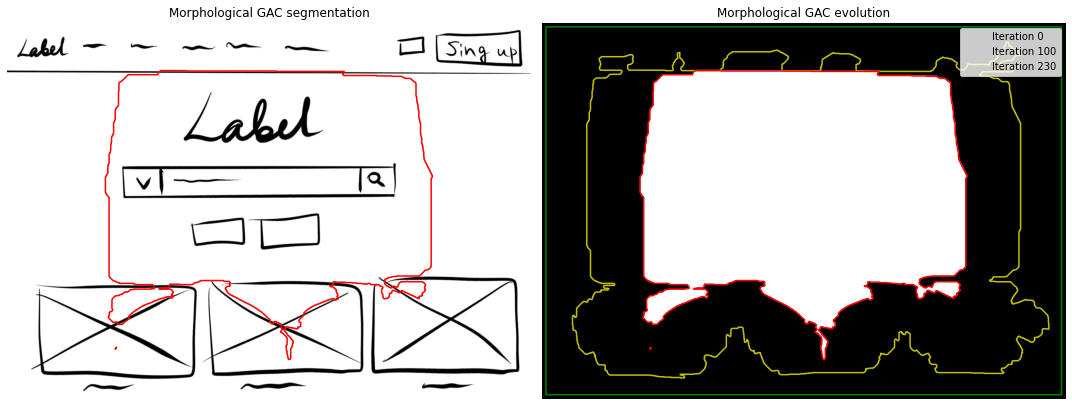

In [34]:
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological GAC
#image = img_as_float(data.coins())
gimage = inverse_gaussian_gradient(np.mean(image, axis=2))

# Initial level set
init_ls = np.zeros(image.shape[:-1], dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, num_iter=230,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.01,
                                           iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.flatten()
ax[0].imshow(np.mean(image, axis=2), cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological GAC segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[1].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[1].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[1].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()